In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

https://www.kaggle.com/criskiev has recently published the original data that has been removed at the early stages of the competition. This calls for a check if we can predict the switched labels with a model and manage to break through the 0.75 roc auc score in test (without relying on sheer luck).

In [2]:
train = pd.read_csv("../input/tabular-playground-series-nov-2021/train.csv")
original = pd.read_csv("../input/november21/train.csv")

Is the data different from the originally posted one? the answer is no.
So it means that we just concentrate on the labels.

In [3]:
(original.drop(['id', 'target'], axis=1).values - train.drop(['id', 'target'], axis=1).values).mean()

0.0

In [4]:
y = (train.target != original.target).astype(int)
X = train.drop(['target'], axis='columns')

If we check the standard deviation of the switching rate, based on the ids, we notice that it is very low, compatible with a random choice of the elements.

In [5]:
binning = pd.qcut(X['id'], q=200, labels=False)
(train.target != original.target).groupby(binning).mean().std()

0.01026004485271269

Also if we plot the values, we can see that the oscillations are limited and clearly not following a clear trend.

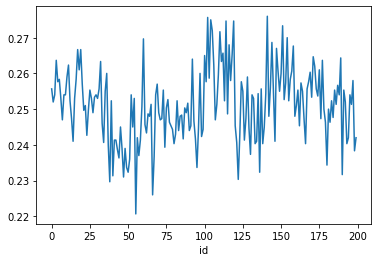

In [6]:
(train.target != original.target).groupby(binning).mean().plot()
plt.show()

As a reminder, we see that actually the id is correlated with the original target because different numeration arcs present different expected probability of positives (use the id as a predictor in your models).

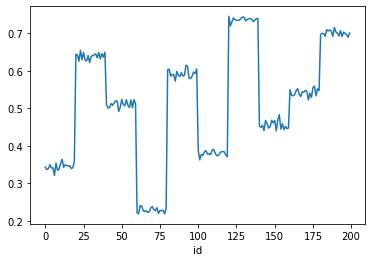

In [7]:
original.target.groupby(binning).mean().plot()
plt.show()

It is left just to try adversarial validation and see if there is any hint for guessing correctly the switched 

In [8]:
model = RandomForestClassifier()
cv_preds = cross_val_predict(model, X, y, 
                             cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=0), 
                             n_jobs=-1, method='predict_proba')

In [9]:
print(roc_auc_score(y_true=y, y_score=cv_preds[:,1]))

0.5023518094952447


Unfortunately the label inversions look unpredictable. We cannot but try to incorporate this uncertainty in our models.